In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
frames = [df1, df2]
titanic_data = pd.concat(frames)

In [3]:
# Preprocess the data
titanic_data = titanic_data[['Pclass', 'Sex', 'Age', 'Survived']]
titanic_data.dropna(inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

In [4]:
# Split the data into features and labels
X = titanic_data[['Pclass', 'Sex', 'Age']].values
y = titanic_data['Survived'].values

In [5]:
# Separate the data by class
X_survived = X[y == 1]
X_not_survived = X[y == 0]

In [6]:
# Calculate the mean and standard deviation for each feature by class
means_survived = np.mean(X_survived, axis=0)
stds_survived = np.std(X_survived, axis=0)
means_not_survived = np.mean(X_not_survived, axis=0)
stds_not_survived = np.std(X_not_survived, axis=0)

In [7]:
# Define the Gaussian probability density function
def gaussian_pdf(x, mean, std):
    exponent = np.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

In [8]:
# Predict the labels using Naive Bayes
predictions = []

for sample in X:
    p_survived = len(X_survived) / len(X)
    p_not_survived = len(X_not_survived) / len(X)
    
    p_features_survived = np.prod(gaussian_pdf(sample, means_survived, stds_survived))
    p_features_not_survived = np.prod(gaussian_pdf(sample, means_not_survived, stds_not_survived))
    
    p_survived_given_features = p_survived * p_features_survived
    p_not_survived_given_features = p_not_survived * p_features_not_survived
    
    predicted_label = 1 if p_survived_given_features > p_not_survived_given_features else 0
    predictions.append(predicted_label)

In [9]:
# Calculate the accuracy of the predictions
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

Accuracy: 0.7829131652661064


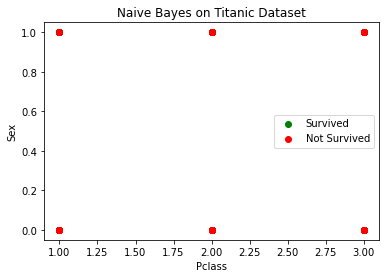

In [10]:
# Visualize the results
survived_indices = np.where(y == 1)[0]
not_survived_indices = np.where(y == 0)[0]

plt.scatter(X[survived_indices, 0], X[survived_indices, 1], c='g', label='Survived')
plt.scatter(X[not_survived_indices, 0], X[not_survived_indices, 1], c='r', label='Not Survived')
plt.xlabel('Pclass')
plt.ylabel('Sex')
plt.title('Naive Bayes on Titanic Dataset')
plt.legend()
plt.show()